In [1]:
from relaxations_modular import relax_fb_analytical
from parameters import *

In [2]:
# params = [0.01117443, 0.01157201, 0.00073944, 0.00819707, 0.00347761, 
#           0.00782532, 0.00232722, 0.00598841, 0.07557605, 0.001842,   
#           0.00898831]

params_fb_estimation = [-6.10e-05,  1.4e-05,  3.00e-05] 


In [3]:
# hA_ft_c, hA_tc_c, hA_mc_c, hA_ft_hx, hA_ht_hx, hA_ct_hx, hA_th_hxch, \
#     hA_ht_hxhw, hA_tw_hxhw, hA_ht_hxhwc, hA_tw_hxhwc = params



In [4]:
m, sol = relax_fb_analytical(params_fb_estimation)

finalizing integrator...
integrating...


Integration progress:   0%|          | 0/4000 [00:00<?, ?it/s]

Generating, compiling, and loading C code.


Integration progress: 100%|██████████| 4000/4000 [00:01<00:00, 3771.07it/s]


In [5]:
power = 2.10 * m.nodes['n'].y_out[-1]
dT_fuel = m.nodes['c_f2'].y_out[-1] - (m.nodes['hx_fh1_f2'].y_out[-1] + m.nodes['hx_fh2_f2'].y_out[-1]) / 2
dT_coolant = m.nodes['c_c2'].y_out[-1] - (m.nodes['hx_ch1_c2'].y_out[-1] + m.nodes['hx_ch2_c2'].y_out[-1]) / 2
Q_fuel = scp_f * W_f * dT_fuel
Q_coolant = scp_c * W_c * dT_coolant
Q_fuel_pct = Q_fuel / power
Q_coolant_pct = Q_coolant / power

print(f"power: {power}")
print(f"dT fuel: {dT_fuel}")
print(f"dT coolant: {dT_coolant}")
print(f"Q_fuel: {Q_fuel}")
print(f"Q_coolant: {Q_coolant}")
print(f"Q_fuel pct: {Q_fuel_pct}")
print(f"Q_coolant pct: {Q_coolant_pct}")
print()
print(f"delta P: {(power-2.10)/2.10}")
print(f"delta dTf: {(dT_fuel-174)/174}")
print(f"delta dTc: {(dT_coolant-61)/61}")
print(f"delta Qf: {(Q_fuel-1.52)/1.52}")
print(f"delta Qc: {(Q_coolant-0.58)/0.58}")
print(f"delta Qf_pct: {(Q_fuel_pct-0.72)/0.72}")
print(f"delta Qc_pct: {(Q_coolant_pct-0.28)/0.28}")

IndexError: index -1 is out of bounds for axis 0 with size 0

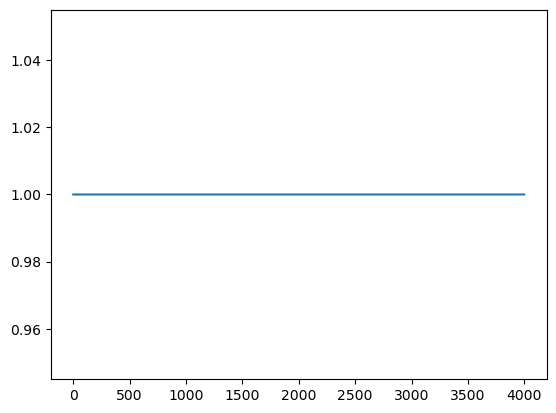

In [6]:
import matplotlib.pyplot as plt
plt.plot([s[6] for s in sol])